In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from package.data import TemporalData, Audio, Dataset
from package.kernels import DWT
import numpy as np
import pandas as pd

In [2]:
# Defining Speaker information Based on speaker code (found in each filename)
speakers = { 
    '03' : ('male', 31),
    '08' : ('female', 34),
    '09' : ('female', 21),
    '10' : ('male', 32),
    '11' : ('male', 26),
    '12' : ('male', 30),
    '13' : ('female', 32),
    '14' : ('female', 35),
    '15' : ('male', 25),
    '16' : ('female', 31)
}

#Defining label and Emotion string from emotion code (found in each filename)
emotions = {
    'W' : 'anger',
    'L' : 'boredom',
    'E' : 'disgust',
    'A' : 'anxiety/fear',
    'F' : 'happiness',
    'T' : 'sadness',
    'N' : 'neutral',
}
audios = []
classes = []
for filename in os.listdir('Berlin Database Of Emotional Speech'):
    # Reading Data from .wav Files
    if filename.endswith('.wav'):
        windowedAudios, n_windows = Audio('Berlin Database Of Emotional Speech/'+filename).window(2**14, overlap = 0.6)
        audios += windowedAudios
        classes += [{
            'speaker': filename[:2],
            'sex': speakers[filename[:2]][0],
            'age': speakers[filename[:2]][1],
            'text code': filename[2:5] ,
            'emotion': emotions[filename[5]],
        }]* n_windows

X = pd.DataFrame(audios)
classes = pd.DataFrame(classes)
label = classes['emotion']

dataset = Dataset(X, y= label, classes = classes)

/Users/agustinrestrepo/Documents/Projects/EmotionSystem/package/data.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wavfile.read(filename)


In [3]:
dwt = DWT()
datasetdwt = dwt.fit(dataset)

100%|██████████| 1786/1786 [03:13<00:00,  9.22it/s]


In [4]:
dataset = Dataset.load(path='.datasetdwt/')

In [5]:
from package.kernels import Normalize, Dropna
norm = Normalize()
dataset = norm.fit(dataset)
dropna = Dropna()
dataset = dropna.fit(dataset)

In [6]:
%matplotlib qt

In [8]:
from package.selection import ForwardFeatureSelection
ffs = ForwardFeatureSelection()
dataset = ffs.fit(dataset)

In [9]:
%matplotlib inline

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


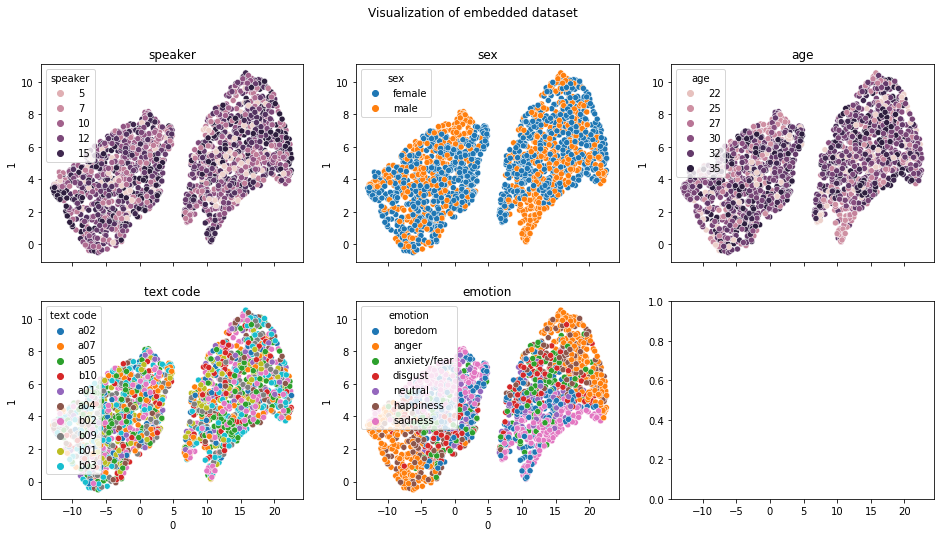

In [10]:
from package.visualization import Visualization
from package.DimensionalityReduction import UMAP
import matplotlib.pyplot as plt
# close all matplotlib figures
plt.close('all')

vis = Visualization()

vis.fit(dataset)
vis.plot(dataset)


In [9]:
import os
import numpy as np

import pandas as pd
from scipy.io import wavfile
from IPython.display import clear_output
from package.kernels import DWT, Normalize, Dropna
from package.data import Dataset

# Defining Speaker information Based on speaker code (found in each filename)
speakers = { 
    '03' : ('male', 31),
    '08' : ('female', 34),
    '09' : ('female', 21),
    '10' : ('male', 32),
    '11' : ('male', 26),
    '12' : ('male', 30),
    '13' : ('female', 32),
    '14' : ('female', 35),
    '15' : ('male', 25),
    '16' : ('female', 31)
}

#Defining label and Emotion string from emotion code (found in each filename)
emotions = {
    'W' : 'anger',
    'L' : 'boredom',
    'E' : 'disgust',
    'A' : 'anxiety/fear',
    'F' : 'happiness',
    'T' : 'sadness',
    'N' : 'neutral',
}

# Checking if dataset.pkl is in directoryd
dataset_path = 'dataset.pkl'
debug = False
if os.path.exists(dataset_path) and not debug:
    dataset = Dataset.load(filename=dataset_path)
else:
    temporalData = []
    #Reading Data from database and appending to list
    classes = {'speaker':[], 'sex':[], 'age': [], 'text code':[], 'emotion':[]}
    for filename in os.listdir('Berlin Database Of Emotional Speech')[:10]:
        # Reading Data from .wav Files
        if filename.endswith('.wav'):
            samplerate, data = \
                wavfile.read('Berlin Database Of Emotional Speech/'+filename)
            temporalData.append(data)
            classes['speaker'].append(filename[:2])
            classes['sex'].append(speakers[filename[:2]][0])
            classes['age'].append(speakers[filename[:2]][1])
            classes['text code'].append(filename[2:5])
            classes['emotion'].append(emotions[filename[5]])
            
    dataset = Dataset(temporalData, 2**14,  
        overlap = 0.6, 
        verbose = True, 
        classes= pd.DataFrame(classes), 
        label = 'emotion',
        processors=[
            DWT(),
            Normalize(),
            Dropna(),
        ])
    dataset.save(filename=dataset_path)

/var/folders/8n/_7860n3x44gfg2xfqmjh0d0w0000gn/T/ipykernel_37578/2350494178.py:48: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wavfile.read('Berlin Database Of Emotional Speech/'+filename)
100%|██████████| 42/42 [00:10<00:00,  3.89it/s]



            Wavelet Decomposition
            Wavelets: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10']
            Max Level: 14
            Functions: ['mean', 'var', 'skew', 'kurt', 'rms']
        
Features Normalized
Nan dropped features: ['db1-2-cA-kurt', 'db1-2-cD-kurt', 'db1-2-cD-rms', 'db1-3-cD-mean', 'db1-3-cA-var', 'db1-3-cD-var', 'db1-3-cA-skew', 'db1-3-cD-skew', 'db1-3-cA-kurt', 'db1-3-cD-kurt', 'db1-3-cD-rms', 'db1-4-cD-mean', 'db1-4-cA-var', 'db1-4-cD-var', 'db1-4-cA-skew', 'db1-4-cD-skew', 'db1-4-cA-kurt', 'db1-4-cD-kurt', 'db1-4-cD-rms', 'db1-5-cD-mean', 'db1-5-cA-var', 'db1-5-cD-var', 'db1-5-cA-skew', 'db1-5-cD-skew', 'db1-5-cA-kurt', 'db1-5-cD-kurt', 'db1-5-cD-rms', 'db1-6-cD-mean', 'db1-6-cA-var', 'db1-6-cD-var', 'db1-6-cA-skew', 'db1-6-cD-skew', 'db1-6-cA-kurt', 'db1-6-cD-kurt', 'db1-6-cD-rms', 'db1-7-cD-mean', 'db1-7-cA-var', 'db1-7-cD-var', 'db1-7-cA-skew', 'db1-7-cD-skew', 'db1-7-cA-kurt', 'db1-7-cD-kurt', 'db1-7-cD-rms', 'db1-8-cD-mean',

In [11]:
Dataset.load(filename=dataset_path).label

AttributeError: 'Dataset' object has no attribute 'label'

In [10]:
dataset.label

'emotion'

In [3]:
from package.SupervisedLearning import DecisionTree

%matplotlib qt
from package.selection import forwardFeatureSelection, plot_loss, early_stopping
X_train, X_test, y_train, y_test = dataset.get_train_test(test_size=0.2, random_state=42)

def func(selection):
    # training tree desicion model on dataset[features] and emotions[labels][emotions]
    model = DecisionTree(random_state=0, max_depth = 10)
    model.fit(X_train[selection], y_train)
    # Calculate loss
    return -model.score(X_test[selection], y_test)

#%matplotlib inline
res = forwardFeatureSelection(func, list(dataset.features.columns),
    callbacks = [
        plot_loss(),
        early_stopping(5),
    ])
res

AttributeError: 'Dataset' object has no attribute 'label'

In [5]:
{
	'selection': ['db1-1-cA-rms',
		'db5-0-cA-skew',
		'db7-1-cD-var',
		'db2-0-cA-mean',
		'db3-0-cD-var',
		'db6-0-cD-rms',
		'db10-1-cA-mean',
		'db8-1-cD-kurt',
		'db5-2-cD-var',
		'db10-2-cA-mean',
		'db7-7-cD-mean',
		'db2-8-cD-kurt',
		'db7-1-cD-var',
		'db8-10-cA-skew'],
	'value': -0.60546875
}

In [22]:
dataset

,db1-0-cA-kurt,db1-0-cA-mean,db1-0-cA-rms,db1-0-cA-skew,db1-0-cA-var,db1-0-cD-kurt,db1-0-cD-mean,db1-0-cD-rms,db1-0-cD-skew,db1-0-cD-var,...,db9-9-cA-kurt,db9-9-cA-mean,db9-9-cA-rms,db9-9-cA-skew,db9-9-cA-var,db9-9-cD-kurt,db9-9-cD-mean,db9-9-cD-rms,db9-9-cD-skew,db9-9-cD-var
observation,,,,,,,,,,,,,,,,,,,,,
0,0.016479,0.720750,0.280821,0.659831,0.211679,0.005622,0.521760,0.452244,0.389512,0.232090,...,0.823672,0.554565,0.000615,1.000000e+00,0.000002,0.822498,0.458742,0.001462,2.078593e-11,0.000002
1,0.017818,0.712065,0.269230,0.659172,0.191827,0.007455,0.493495,0.425014,0.406029,0.200358,...,0.827987,0.543129,0.020093,1.000000e+00,0.000785,0.826791,0.469497,0.027996,2.029858e-11,0.000785
2,0.065527,0.710415,0.193790,0.597007,0.062482,0.015730,0.529939,0.236839,0.418597,0.030840,...,0.827588,0.507054,0.085859,1.000000e+00,0.023278,0.826439,0.509434,0.152550,2.033108e-11,0.023278
3,0.031993,0.721588,0.086898,0.701616,0.044626,0.010787,0.536115,0.195562,0.417628,0.061826,...,0.825245,0.560066,0.012004,1.000000e+00,0.004848,0.824042,0.450943,0.069607,2.060900e-11,0.004848
4,0.024528,0.730047,0.073636,0.680571,0.056850,0.012466,0.491011,0.165987,0.425891,0.126065,...,0.827907,0.623461,0.125713,3.303609e-12,0.038309,0.826749,0.392138,0.195706,1.000000e+00,0.038309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,0.027595,0.683111,0.184285,0.570067,0.055844,0.004609,0.471764,0.239413,0.417358,0.030909,...,0.828917,0.391728,0.293681,1.000000e+00,0.094897,0.827820,0.587841,0.308036,2.017321e-11,0.094897
2554,0.063539,0.639738,0.155490,0.582471,0.035313,0.012447,0.622276,0.175116,0.449746,0.026444,...,0.825052,0.556919,0.005449,1.000000e+00,0.000903,0.823881,0.456735,0.030022,2.062906e-11,0.000903
2555,0.051294,0.726250,0.210842,0.567131,0.069403,0.008459,0.474004,0.275370,0.438378,0.019445,...,0.908450,0.571738,0.031521,5.479636e-13,0.000002,0.908627,0.443151,0.001305,1.000000e+00,0.000002


In [26]:
from package.UnsupervisedLearning import UMAP

umap = UMAP(n_components=2)
umap.fit(dataset.get_features())


In [17]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

def scatter_plotter(space, labels):
    le = preprocessing.LabelEncoder()
    numberical_labels = le.fit_transform(labels)
    plt.scatter(space[:,0], space[:,1], c=numberical_labels, cmap='viridis')

    

In [ ]:
from package.Clustering import KMeans
from package.DimensionalityReduction import UMAP

def plot_clusters(algorithms, ReductionAlgorithm, features):
    reduction = ReductionAlgorithm(n_components=2)
    reduction.fit(features)
    for algorithm in algorithms:
        model = algorithm()
        model.fit(dataset.get_features())
        model.clf.labels_
        scatter_plotter(reduction.embedding, model.labels)

plot_clusters([KMeans], UMAP, dataset.get_features())

In [ ]:
dataset['cluster']